# Car Price Prediction using MLP

In this we predict **car price** from car features using:

- One-hot encoded categorical features
- Scaled numeric features
- A **Multilayer Perceptron (MLP)** regressor

Steps:
1. Load and inspect the dataset  
2. Choose the target column (car price)  
3. Encode categorical features  
4. Train–test split  
5. Build and train MLP regressor  
6. Evaluate with R² and error, and plot predictions vs true prices


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

%matplotlib inline

DATA_PATH = "car_prediction_data.csv"

TARGET_COL = "Selling_Price"


## 1. Load and inspect the dataset

We load the CSV, check its shape, show the first few rows, and list column names.
Then we decide which column will be the **target** (car price).


In [13]:
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())


Shape: (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0



Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


## 2. Target (price) distribution

We confirm the target column exists and look at basic statistics and a histogram.


count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64


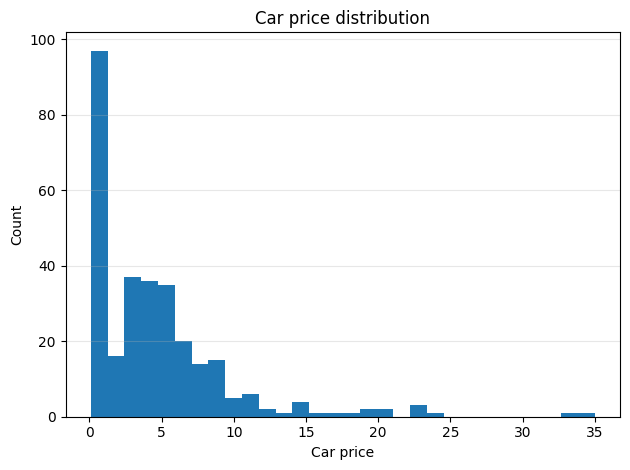

In [14]:
if TARGET_COL not in df.columns:
    raise ValueError(f"TARGET_COL='{TARGET_COL}' not found. Please set it to one of: {df.columns.tolist()}")

print(df[TARGET_COL].describe())

plt.hist(df[TARGET_COL], bins=30)
plt.xlabel("Car price")
plt.ylabel("Count")
plt.title("Car price distribution")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


## 3. Preprocess features

We:
- Separate features `X` and target `y`
- One-hot encode **categorical** columns


In [15]:
# Separate features and target
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Identify categorical columns (object / string)
cat_cols = X.select_dtypes(include="object").columns.tolist()
print("Categorical columns:", cat_cols)

# One-hot encode categoricals
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)
X_encoded.head()


Categorical columns: ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
Shape before encoding: (301, 8)
Shape after encoding: (301, 105)


,Year,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,9.54,43000,0,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,9.85,6900,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,4.15,5200,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,6.87,42450,0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


## 4. Train–test split

We split the encoded data into training and test sets (80/20).


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 240
Test size: 61


## 5. Build and train the MLP regressor

Pipeline:
1. `StandardScaler` to scale features  
2. `MLPRegressor` to predict car price


In [17]:
mlp_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(64, 32),  # two hidden layers
        activation="relu",
        solver="adam",
        alpha=1e-4,
        max_iter=300,
        random_state=42
    ))
])

print("Training MLP regressor...")
mlp_pipe.fit(X_train, y_train)
print("Done.")


Training MLP regressor...
Done.


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## 6. Evaluate the model

We compute:
- R² score (how much variance is explained)
- Mean Absolute Error (MAE)
- A scatter plot of true vs predicted prices


R² score: 0.8054
Mean Absolute Error: 1.17


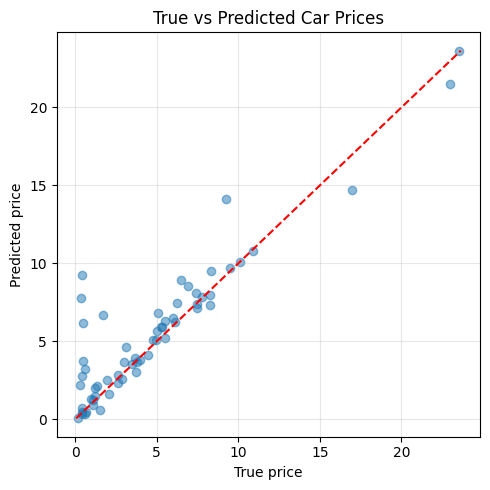

In [18]:
y_pred = mlp_pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.title("True vs Predicted Car Prices")
plt.grid(alpha=0.3)
# Add y=x reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")
plt.tight_layout()
plt.show()
